In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Csucsu\Desktop\own projects\cancer2017.csv', encoding='cp1252')
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,†,70,100,†,60,280,†,†,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [3]:
df.shape

(51, 11)

In [4]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

In [5]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))
print_categories(df)

State :  Text (Unique)
Brain/ nervous system :  Categorical
Female breast :  Categorical
Colon & rectum :  Categorical
Leukemia :  Categorical
Liver :  Categorical
Lung & bronchus :  Categorical
Non-Hodgkin Lymphoma :  Categorical
Ovary :  Categorical
Pancreas :  Categorical
Prostate :  Categorical


In [6]:
import re
cols = df.columns.values[1:]
df[cols] = df[cols].replace('†','0')
df[cols].astype(str)
df = df.replace(',','', regex=True)
df[cols] = df[cols].astype(int)

In [7]:
#calculate percentage of missing values:
columns = df.columns.values.tolist()

for i in range(1, len(columns)):
    length = len(df[columns[i]])
    count = np.count_nonzero(df[columns[i]])
    zero_value = length - count
    pct_of_missing_values = float(zero_value / length)
    pct_of_missing_values = '{0:.1f}%'.format(pct_of_missing_values*100)
    print(columns[i],'has', pct_of_missing_values, 'missing values')

Brain/ nervous system has 7.8% missing values
Female breast has 0.0% missing values
Colon & rectum has 0.0% missing values
Leukemia has 3.9% missing values
Liver has 3.9% missing values
Lung & bronchus has 0.0% missing values
Non-Hodgkin Lymphoma has 9.8% missing values
Ovary has 11.8% missing values
Pancreas has 0.0% missing values
Prostate has 2.0% missing values


In [8]:
#calculate mins and maxs:
for i in range(1,len(columns)):
    print(columns[i],':')
    print('Maximum is:', df[columns[i]].max())
    print('Minimum is:', df[columns[i]].min())

Brain/ nervous system :
Maximum is: 1830
Minimum is: 0
Female breast :
Maximum is: 4440
Minimum is: 60
Colon & rectum :
Maximum is: 5240
Minimum is: 80
Leukemia :
Maximum is: 2610
Minimum is: 0
Liver :
Maximum is: 3750
Minimum is: 0
Lung & bronchus :
Maximum is: 12000
Minimum is: 220
Non-Hodgkin Lymphoma :
Maximum is: 2140
Minimum is: 0
Ovary :
Maximum is: 1530
Minimum is: 0
Pancreas :
Maximum is: 4510
Minimum is: 70
Prostate :
Maximum is: 3130
Minimum is: 0


In [9]:
#calculate mode:
for i in range(1,len(columns)):
    print('{} Mode:'.format(columns[i]), df[columns[i]].mode())

Brain/ nervous system Mode: 0     0
1    50
dtype: int32
Female breast Mode: 0    70
dtype: int32
Colon & rectum Mode: 0    830
dtype: int32
Leukemia Mode: 0    550
dtype: int32
Liver Mode: 0    440
1    670
dtype: int32
Lung & bronchus Mode: 0     220
1     590
2     760
3    2450
4    4030
dtype: int32
Non-Hodgkin Lymphoma Mode: 0    0
dtype: int32
Ovary Mode: 0    0
dtype: int32
Pancreas Mode: 0    710
dtype: int32
Prostate Mode: 0    70
dtype: int32


In [10]:
for i in range(1, len(columns)):
    print(columns[i], 'mean is', df[columns[i]].mean())

Brain/ nervous system mean is 324.5098039215686
Female breast mean is 795.8823529411765
Colon & rectum mean is 985.2941176470588
Leukemia mean is 479.80392156862746
Liver mean is 565.2941176470588
Lung & bronchus mean is 3056.8627450980393
Non-Hodgkin Lymphoma mean is 391.5686274509804
Ovary mean is 272.94117647058823
Pancreas mean is 845.2941176470588
Prostate mean is 523.5294117647059


In [11]:
for i in range(1, len(columns)):
    print(columns[i], 'median is', df[columns[i]].median())

Brain/ nervous system median is 250.0
Female breast median is 570.0
Colon & rectum median is 710.0
Leukemia median is 340.0
Liver median is 390.0
Lung & bronchus median is 2450.0
Non-Hodgkin Lymphoma median is 290.0
Ovary median is 200.0
Pancreas median is 580.0
Prostate median is 370.0


In [12]:
for i in range(1, len(columns)):
    print(columns[i], 'standard deviation is', df[columns[i]].std())

Brain/ nervous system standard deviation is 345.2495545282583
Female breast standard deviation is 860.7884210898477
Colon & rectum standard deviation is 1039.5024828083413
Leukemia standard deviation is 511.012681627681
Liver standard deviation is 684.0185755991616
Lung & bronchus standard deviation is 2900.6223402546425
Non-Hodgkin Lymphoma standard deviation is 426.12849024217854
Ovary standard deviation is 297.9080000110575
Pancreas standard deviation is 891.5612215460617
Prostate standard deviation is 569.1566516501824


In [13]:
for i in range(1, len(columns)):
    print(columns[i], 'quantile distribution is', df[columns[i]].quantile([.25,.50,.75]))

Brain/ nervous system quantile distribution is 0.25    100.0
0.50    250.0
0.75    385.0
Name: Brain/ nervous system, dtype: float64
Female breast quantile distribution is 0.25    210.0
0.50    570.0
0.75    890.0
Name: Female breast, dtype: float64
Colon & rectum quantile distribution is 0.25     255.0
0.50     710.0
0.75    1150.0
Name: Colon & rectum, dtype: float64
Leukemia quantile distribution is 0.25    140.0
0.50    340.0
0.75    550.0
Name: Leukemia, dtype: float64
Liver quantile distribution is 0.25    140.0
0.50    390.0
0.75    670.0
Name: Liver, dtype: float64
Lung & bronchus quantile distribution is 0.25     760.0
0.50    2450.0
0.75    3920.0
Name: Lung & bronchus, dtype: float64
Non-Hodgkin Lymphoma quantile distribution is 0.25    110.0
0.50    290.0
0.75    465.0
Name: Non-Hodgkin Lymphoma, dtype: float64
Ovary quantile distribution is 0.25     70.0
0.50    200.0
0.75    325.0
Name: Ovary, dtype: float64
Pancreas quantile distribution is 0.25    240.0
0.50    580.0
0.

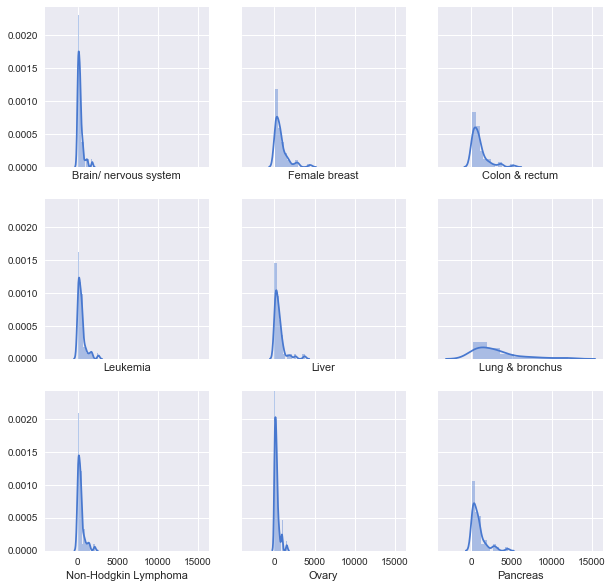

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i in range(len(cols)-1): 
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    ax_curr.set_xlabel('')
    sns.distplot(df[cols[i]].dropna(), ax=ax_curr)

In [15]:
df[cols].corr()

,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
Brain/ nervous system,1.000000,0.993748,0.991724,0.994241,0.982556,0.964551,0.993598,0.991521,0.992478,0.995881
Female breast,0.993748,1.000000,0.997233,0.995102,0.983072,0.969845,0.994651,0.995526,0.996608,0.993100
Colon & rectum,0.991724,0.997233,1.000000,0.995226,0.983397,0.975172,0.994862,0.991753,0.994259,0.988444
Leukemia,0.994241,0.995102,0.995226,1.000000,0.979650,0.972048,0.998215,0.994139,0.996804,0.992699
Liver,0.982556,0.983072,0.983397,0.979650,1.000000,0.929116,0.976800,0.977590,0.975592,0.980872
Lung & bronchus,0.964551,0.969845,0.975172,0.972048,0.929116,1.000000,0.974812,0.964753,0.973407,0.952876
Non-Hodgkin Lymphoma,0.993598,0.994651,0.994862,0.998215,0.976800,0.974812,1.000000,0.994724,0.997278,0.991525
Ovary,0.991521,0.995526,0.991753,0.994139,0.977590,0.964753,0.994724,1.000000,0.996065,0.992434
Pancreas,0.992478,0.996608,0.994259,0.996804,0.975592,0.973407,0.997278,0.996065,1.000000,0.992651
Prostate,0.995881,0.993100,0.988444,0.992699,0.980872,0.952876,0.991525,0.992434,0.992651,1.000000


In [16]:
df[cols].describe()

,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,324.509804,795.882353,985.294118,479.803922,565.294118,3056.862745,391.568627,272.941176,845.294118,523.529412
std,345.249555,860.788421,1039.502483,511.012682,684.018576,2900.622340,426.128490,297.908000,891.561222,569.156652
min,0.000000,60.000000,80.000000,0.000000,0.000000,220.000000,0.000000,0.000000,70.000000,0.000000
25%,100.000000,210.000000,255.000000,140.000000,140.000000,760.000000,110.000000,70.000000,240.000000,165.000000
50%,250.000000,570.000000,710.000000,340.000000,390.000000,2450.000000,290.000000,200.000000,580.000000,370.000000
75%,385.000000,890.000000,1150.000000,550.000000,670.000000,3920.000000,465.000000,325.000000,950.000000,610.000000
max,1830.000000,4440.000000,5240.000000,2610.000000,3750.000000,12000.000000,2140.000000,1530.000000,4510.000000,3130.000000


In [17]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,51
Total Missing (%),0.0%
Total size in memory,2.5 KiB
Average record size in memory,49.6 B
Numeric,1
Categorical,0
Date,0
Text (Unique),1
Rejected,9
Distinct count,36


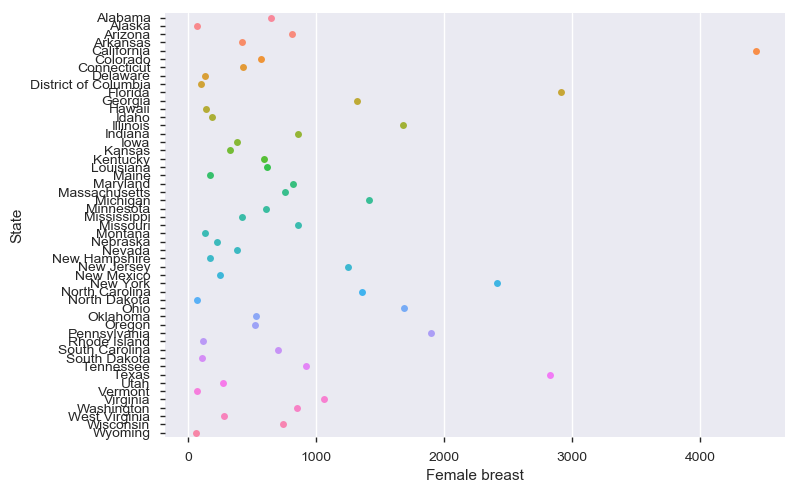

In [24]:
import seaborn as sns
cols = df.columns.values[1:]
sns.swarmplot(x=df[cols[1]], y='State', data=df)